# Final Project
## Network Data Description

The network we chose for our project is comprised of sociocentric data collected from a village in rural Karnataka, India. Sociocentric studies focus on a small population and attempt to ascertain all of the social relationships within a set of interconnected individuals (Marin and Wellman, 2011). For large-scale sociocentric data collection efforts, the most practical means of eliciting the names of social contacts is through the administration of surveys that are administered uniformly to the entire population (Burt, 1984; Marin, 2004). 

In the Karnataka data, information was collected via survey as part of a study to understand the network diffusion of microfinance. The microfinance institution Bharatha Swamukti Samsthe (BSS) relies on world-of-mouth communication to reach potential borrowers. The network data was collected by the researchers 6 months before the BSS’s entry into the village. The individual survey collected social network data, asking participants (egos) the name of those people with whom they have social connections (alters) along 12 dimensions. This kind of question is called a “name generator” and they represent the nodes in our network. There are 110 nodes in our network. 

The purpose of our project is to analyze the characteristics of the networks elicited by 12 different name generators. Name generator questions included interactive (people with whom an ego interacts during the day); role relation (specific relationships such as spouse or mother), and exchange ties (people with whom an ego engages in reciprocal service provision such as borrowing and lending money). The following questions were used to form the egdws in our directed graph, and there are  736  edges in our network: 

(1) Talk to: Name the 4 non-relatives whom you speak to the most.
(2) Visit their home: In your free time, whose house do you visit?
(3) Invite home: Who visits your house in his or her free time?
(4) Borrow rice from: If you needed to borrow kerosene or rice, to whom would you go?
(5) Lend rice to: Who would come to you if he/she needed to borrow kerosene or rice?
(6) Borrow money from: If you suddenly needed to borrow 50 Rupees for a day, whom would you ask? (This represents roughly one days wages in these villages).
(7) Lend money to: Who do you trust enough that if he/she needed to borrow 50 Rupees for a day you would lend it the him/her?
(8) Give advice to: Who comes to you for advice?
(9) Take advice from: If you had to make a difficult personal decision, whom would you ask for advice?
(10) Help during emergency: If you had a medical emergency and were alone at home whom would you ask for help in getting to a hospital?
(11) Related to: Name any close relatives, aside those in this household, who also live in this village?
(12) Go to temple with: Do you visit temple/mosque/church? Do you go with anyone else? What are the names of these people?

Becauce an edge is formed if either of those relations exixts between the nodes in our sociocentric data, our network is an or type network. 

### Importing packages

In [2]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### Import network data

In [3]:
MF_0 = np.load("MF_0.npy")
MF_1 = np.load("MF_1.npy")
MF_2 = np.load("MF_2.npy")
MF_3 = np.load("MF_3.npy")
MF_4 = np.load("MF_4.npy")
MF_5 = np.load("MF_5.npy")
MF_6 = np.load("MF_6.npy")
MF_7 = np.load("MF_7.npy")
MF_8 = np.load("MF_8.npy")
MF_9 = np.load("MF_9.npy")
MF_10 = np.load("MF_10.npy")
MF_11 = np.load("MF_11.npy")
Gender = pd.read_csv("MF_gender.csv")
Caste = pd.read_csv("MF_caste.csv")
Age = pd.read_csv("MF_age.csv")
# The Or network that I will most likely be using:
MF_OR = np.load("MF_OR.npy")

### 1. Exploring the data
#### Number of edges, nodes, whether graph is connected, inspecting components

In [4]:
#Number of edges:
num_edges = np.sum(np.sum(MF_OR, axis = 0))
print("There are", num_edges,"edges in the OR network")
#Numebr of nodes:
num_nodes = len(MF_OR)
print("There are", num_nodes, "nodes in the OR network")

There are 736.0 edges in the OR network
There are 110 nodes in the OR network


In [5]:
Or_G_undir = nx.to_networkx_graph(MF_OR)
print("Is the OR network connected?", nx.is_connected(Or_G_undir))

Is the OR network connected? False


In [6]:
components = list(nx.connected_components(Or_G_undir))
print("Here are the different components:", components)

Here are the different components: [{0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109}, {8, 9, 10, 11}]


It appears that all the nodes except for 8, 9, 10, and 11 are one component, and the rest of the nodes are another component; hence, the network is disconnected.

It's interesting that in a village, four people who form their own component are completly disconnected from any other person in the small village.

#### Exploring the anomalous nodes' metadata (nodes 8, 9, 10, 11):

In [7]:
print("8 has gender value", Gender.iloc[8][0])
print("9 has gender value", Gender.iloc[9][0])
print("10 has gender value", Gender.iloc[10][0])
print("11 has gender value", Gender.iloc[11][0])
# two men, two women

print("8 is age", Age.iloc[8][0])
print("9 is age", Age.iloc[9][0])
print("10 is age", Age.iloc[10][0])
print("11 is age", Age.iloc[11][0])
#ages 40, 30, 56 and 40

print("8 has caste value", Caste.iloc[8][0])
print("9 has caste value", Caste.iloc[9][0])
print("10 has caste value", Caste.iloc[10][0])
print("11 has caste value", Caste.iloc[11][0])
#8,9 are Scheduled Class, 10,11 are OBC


8 has gender value 1
9 has gender value 2
10 has gender value 1
11 has gender value 2
8 is age 40
9 is age 30
10 is age 56
11 is age 40
8 has caste value 1
9 has caste value 1
10 has caste value 0
11 has caste value 0


#### @Bree do you mind if we add this instead: 

The potential explanation why nodes 8, 9, 10, and 11 are isolated may be explained by the cast system in India. Those respondents identify themselves as members of lower castes, including Scheduled Castes (SCs) and Other Backward Classes (OBCs).
Nodes 8 and 9 belong to the Scheduled Castes (often known as Dalits, or historically by the pejorative term “untouchables”), while nodes 10 and 11 are members of Other Backward Classes. 


Caste segregation remains prevalent in India. For example, a substantial share of Brahmins say they would not be willing to accept a person who belongs to a Scheduled Caste as a neighbor. Indians conduct their social lives largely within caste hierarchies, with a majority of Indians say that their close friends are mostly members of their own caste. This expalins why nodes 8,9,10,11 form their own cooncted component. 

Our prediction at this time is that 8,9 and 10,11 are couples that live isolated from the rest of their tribe

#### Within the smaller relation data, are these four ever split into a smaller subgroup?

In [8]:
#Borrow money?
MF_0_G = nx.to_networkx_graph(MF_0)
components_0 = list(nx.connected_components(MF_0_G))
# In this smaller network, {8, 9, 10, 11} are their own component
#Get advice?
MF_1_G = nx.to_networkx_graph(MF_1)
components_1 = list(nx.connected_components(MF_1_G))
#Yes
#Borrow material goods?
MF_3_G = nx.to_networkx_graph(MF_3)
components_3 = list(nx.connected_components(MF_3_G))
#Yes
#Kin?
MF_8_G = nx.to_networkx_graph(MF_8)
components_8 = list(nx.connected_components(MF_8_G))
#Yes, they are related to just each other and nobody else
#non-relative socializing:
MF_7_G = nx.to_networkx_graph(MF_7)
components_7 = list(nx.connected_components(MF_7_G))
#Yes...???

Suprisingly enough, all four nodes continue to be their own subgroup rather than splitting when name non-relative community members with whom they socialize. Since they all named each other as kin this seems untrue. This leads us to believe that the cast devide is behind the division or this is an error in the data collection. It's possible that this family didn't want to take the time in filling out the survey, maybe the head of the house filled it out for all members and did it incorrectly.

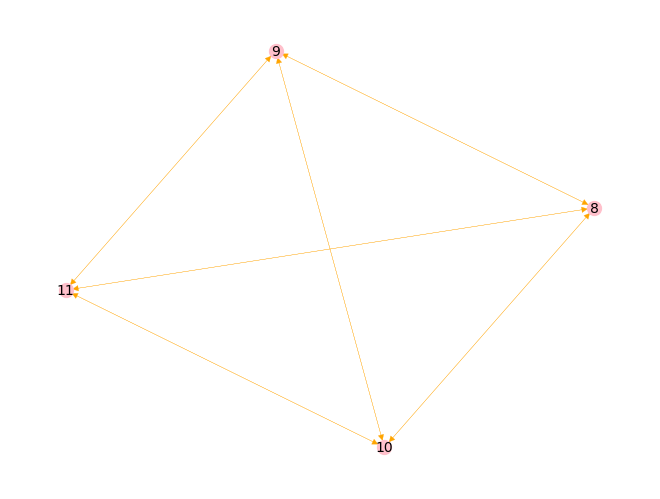

In [10]:
Or_G = nx.to_networkx_graph(MF_x_G, create_using = nx.DiGraph) #x is the relation being viewed (0,1,2.. etc.)
Family = nx.subgraph(Or_G, [8,9,10,11])
nx.draw(Family, node_color='pink', node_size=100, edge_color='orange', width = 0.2, with_labels=True, font_size = 10)
#all the nodes are mutual

Additionally, as seen in the network graph above, these four mutually relate to one other for every sub-relation no matter what, further proving that this is a data collection issue.

### 2. Creating an adjacency matrix

In [11]:
#print(MF_OR): Only gives truncated version of adjacency matrix
#np.shape(MF_OR): The array is 110x110 so maybe we prefer the truncated version
#list(MF_OR): Returns full matrix, but it's quite large and not visually helpful

### 3. Plotting the network
#### *Directed network

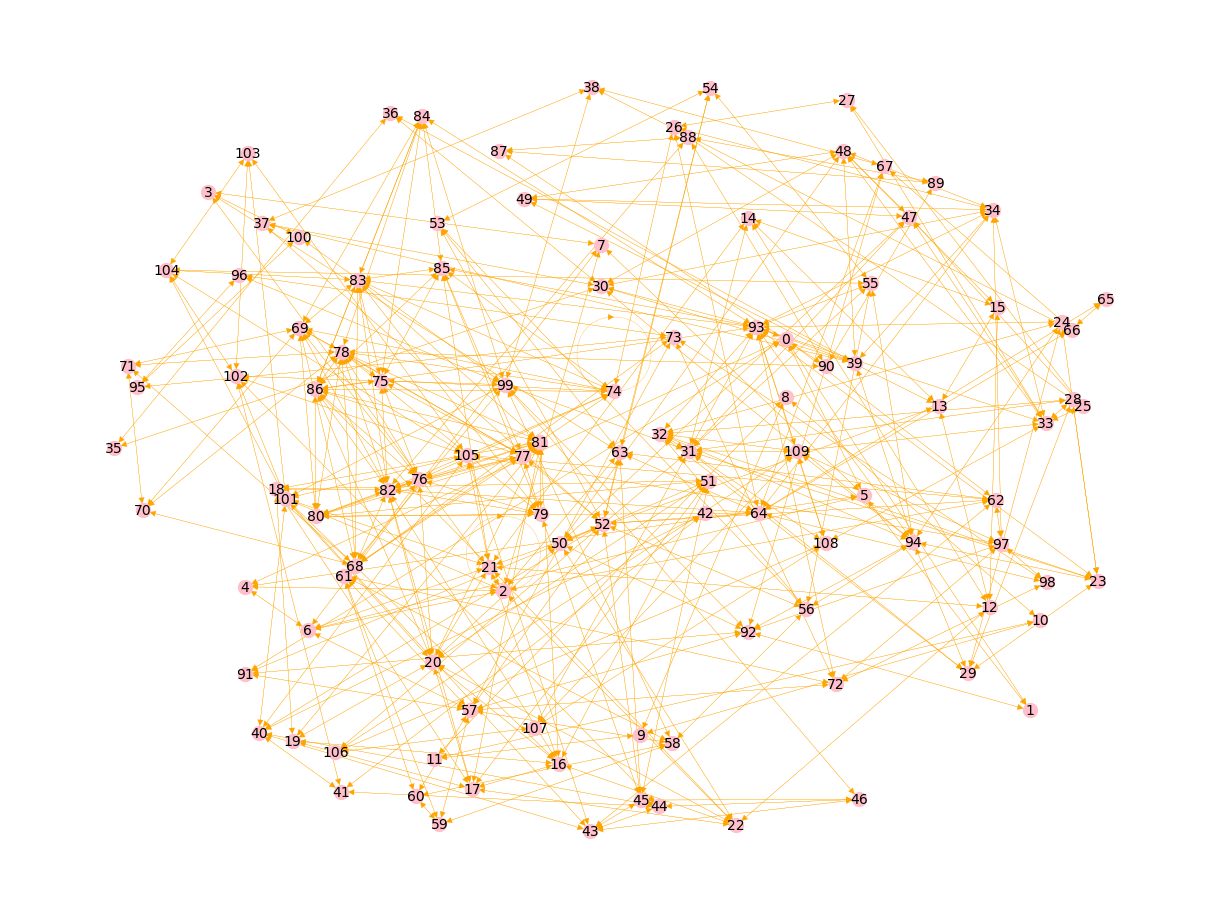

In [12]:
Or_G = nx.to_networkx_graph(MF_OR, create_using = nx.DiGraph)
pos = nx.spring_layout(Or_G, k=1)
plt.figure(figsize = (12,9) )
nx.draw(Or_G, pos, node_color='pink', node_size=100, edge_color='orange', width = 0.2, with_labels=True, font_size = 10)

### 4. Finding the central most nodes

In [13]:
deg_cen = nx.degree_centrality(Or_G)
close_cen = nx.closeness_centrality(Or_G)
eig_cen = nx.eigenvector_centrality(Or_G)
betw_cen = nx.betweenness_centrality(Or_G)

print('The person with highest degree centrality is', max(deg_cen, key=lambda key: deg_cen[key]))
print('The person with highest closeness centrality is', max(close_cen, key=lambda key: close_cen[key]))
print('The person with highest eigenvector centrality is', max(eig_cen, key=lambda key: eig_cen[key]))
print('The person with highest betweenness centrality is', max(betw_cen, key=lambda key: betw_cen[key]))

The person with highest degree centrality is 82
The person with highest closeness centrality is 93
The person with highest eigenvector centrality is 82
The person with highest betweenness centrality is 93


#### Changing the color of each most central node

In [14]:
colors = ['pink'] * len(MF_OR)
colors[82] = 'm' # node 82 had the highest degree and eigenvector centrality
colors[93] = 'teal' # node 93 had the highest closeness and betweenness centrality

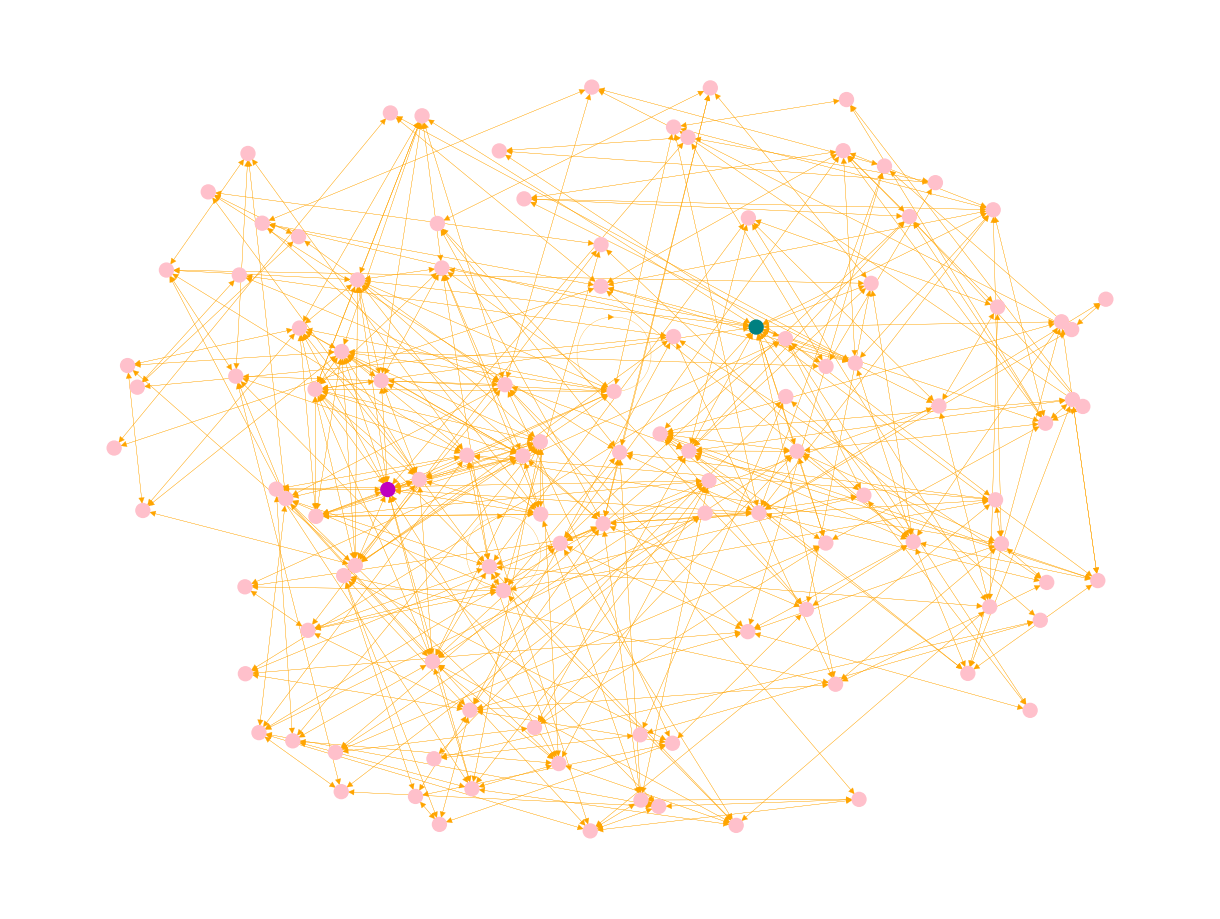

In [15]:
plt.figure(figsize = (12,9) )
nx.draw(Or_G, pos, node_color=colors, node_size=100, edge_color='orange', width = 0.2, with_labels=False)

In this dataset, two nodes: 82 and 93 are considered the most central, each with two measures of centrality considering it as the node of highest centrality. 

### 5. Finding and plotting communities in the network
#### Using the Girvan Newman algorithm

<Figure size 640x480 with 0 Axes>

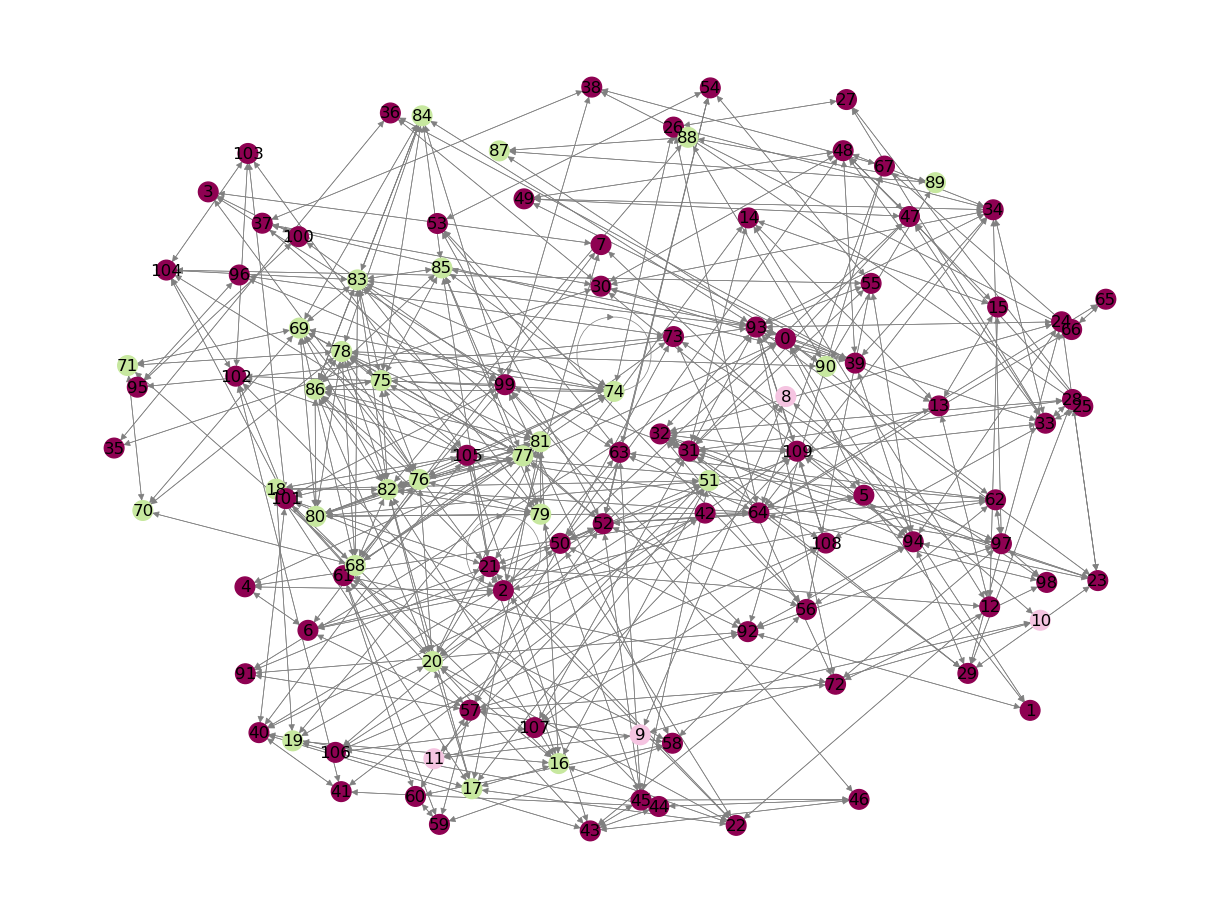

In [16]:
comm = nx.algorithms.community.girvan_newman(Or_G)
gn_communities = tuple(sorted(c) for c in next(comm))
# plotting communities function:
import matplotlib.cm as cmx
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='PiYG')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    plt.figure(figsize = (12,9) )
    nx.draw(Network, pos, node_color=color_map, node_size=200, edge_color='grey', width = 0.5, with_labels=True)
    plt.show()
    return

Plot_Comm(Or_G, gn_communities, pos)

In [17]:
print("Caste value of the nodes highlighted in green")
print("78 has caste value", Caste.iloc[78][0])
print("88 has caste value", Caste.iloc[88][0])
print("18 has caste value", Caste.iloc[18][0])
print("17 has caste value", Caste.iloc[17][0])
print("16 has caste value", Caste.iloc[16][0])
print("20 has caste value", Caste.iloc[20][0])
print("19 has caste value", Caste.iloc[19][0])
print("81 has caste value", Caste.iloc[81][0])
print("82 has caste value", Caste.iloc[82][0])
print("70 has caste value", Caste.iloc[70][0])
print("71 has caste value", Caste.iloc[71][0])
print("68 has caste value", Caste.iloc[68][0])
print("Caste value of the nodes highlighted in red")
print("2 has caste value", Caste.iloc[2][0])
print("4 has caste value", Caste.iloc[4][0])
print("14 has caste value", Caste.iloc[14][0])
print("23 has caste value", Caste.iloc[23][0])
print("30 has caste value", Caste.iloc[30][0])
print("40 has caste value", Caste.iloc[40][0])
print("67 has caste value", Caste.iloc[67][0])
print("96 has caste value", Caste.iloc[96][0])
print("92 has caste value", Caste.iloc[92][0])
print("66 has caste value", Caste.iloc[66][0])
print("13 has caste value", Caste.iloc[13][0])
print("47 has caste value", Caste.iloc[47][0])
print("42 has caste value", Caste.iloc[42][0])

Caste value of the nodes highlighted in green
78 has caste value 1
88 has caste value 1
18 has caste value 0
17 has caste value 0
16 has caste value 0
20 has caste value 1
19 has caste value 1
81 has caste value 0
82 has caste value 1
70 has caste value 0
71 has caste value 0
68 has caste value 0
Caste value of the nodes highlighted in red
2 has caste value 0
4 has caste value 1
14 has caste value 0
23 has caste value 2
30 has caste value 2
40 has caste value 2
67 has caste value 0
96 has caste value 1
92 has caste value 1
66 has caste value 0
13 has caste value 0
47 has caste value 2
42 has caste value 2


#### Do the identified communities make sense given the context of your data?

Using the Girvan Newman algorithm, we identified three communities. The first one is the connceted component 8,9,10, and 11, we identified previously. The secnd community is highlighted in green, and it still belongs to a larger community. The cast system might be behind the community devide. The members of the large connected connected cmponent belong to General and Scheduled Tribe casts, while members of the green community belong to the Scheduled Castes and Other Backward Classes. These findings also support the idea that there might have been some error, during data collection. It's possible that 8-9-10-11 community didn't want to take the time in filling out the survey, maybe the head of the house filled it out for all members and did it incorrectly.

### 6. Degree distribution

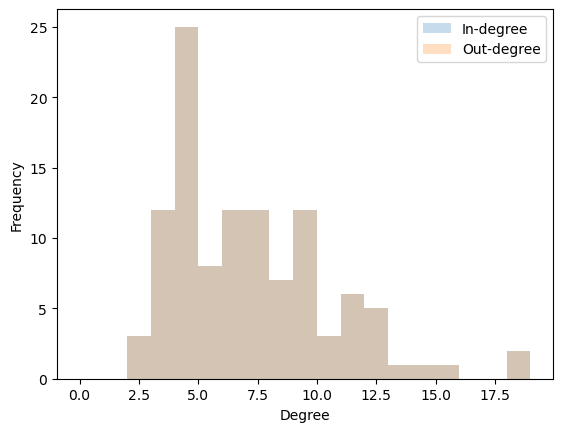

In [18]:
# Calculate in-degree and out-degree of each node
in_degree = [d[1] for d in Or_G.in_degree()]
out_degree = [d[1] for d in Or_G.out_degree()]

# Plot the histograms
plt.hist(in_degree, bins=range(max(in_degree) + 2), alpha=0.25, label='In-degree')
plt.hist(out_degree, bins=range(max(out_degree) + 2), alpha=0.25, label='Out-degree')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

Since it is a directed network and we are looking closely at the diffusion of information, meaning how the information is spreaded out, we only consider out-degree of each ego. From looking at the histogram, the most frequent degree is around 3.5-4 that about 25 egos have that degree. 

In context, about 25 out of 110 villagers have spreaded information to an average of 2.5-4 others within the village about the microfinance, regardless of whether they are participants or not. Significantly, there are a few individuals who have greatly high degree that is above 12.5. 

Our assumption is that these individuals might be node 82 and 93 (and other siginificantly central nodes) which are the most central in the network as we explored before. Nevertheless, it is important to note that the spread of information is more greatly impacted by the major group of individuals that have moderate degrees than the minor group of individuals that have extremely high degrees. Yet, it is also essential to acknowledge that the network is explanded more widely thanks to the formation of 4 main communities and 2 central nodes, since they initate and/or radiate the connection circles, which assumably help other individuals to have a certain number of degree different than 0. 

## Conclusion

#### 1. Do you think about this dataset differently than you did before?

When we just started working with the dataset, we have not learned about information cascade yet. The dataset gave us insight into a real life application of information casade as particiaption of some nodes in the microfincnace program stimulated the bahviour change of other nodes a they switched from being none-participants to participating in the program. 

The analysis of the network shows that some disconnected communities will be very hard to reach, and hence an extra resources should be spent to ensure equitable spread of the information about opportunities such as microfince. 

The analysis also allows us to predict how information about microfincnace loans was diffused amonst the residents of village 5. 
 

#### 2. Did you learn anything about the discipline/domain the network lies in?
Through this paper we learned about the most common types to collect the sociocentric data and different types relations that form edges amongst the nodes in sociocentric networks. We also learned how the information about new policies is spread on a local level as the microfinance institution Bharatha Swamukti Samsthe (BSS) relied on word-of-mouth communication to reach potential borrowers. 


#### 3. What's something you wish you could learn about the network that you might not have a tool for?

Regarding to the evelation of nodes' effectivness as injection points, we would like to know whether it is network distance to these leaders that stimulated the spread of information about microfinance or whether it is the participation of those nodes that stimulated the spread of the infroemation about microfinance.

We could also learn the code or tool to have an analysis that tells us each bar of the histogram associates to which nodes in the network, so that we have information on who have what degree. From that we could draw connections between the number of people each individual decides to introduce to and their kinds of relation/tie/interaction with each other. As a result, we could gain more knowledge about how characteristics of a network and the formation of each community affect the spreading/diffusion of information looking at an individual level.

#### 4. Is there any metadata about the nodes/edges that you wish you could have to interpret your findings better?
From reading the paper we learnt that our data has the data only of the survey respondents but it does have the data on those who were nominated by the respondents so-called nonparticipants. The paper points out that nonparticipants were much more numerous. Participants are 7 times more likely to pass the information, but nonparticipants accounted for one-third of the eventual informedness. If we had the data on nonparticipants as well maybe the 8-9-10-11 component would not be disconnected from the larger connected component. 

It would also be nice to know maybe how long they'd been a part of the village, and potentially their occupation as well. This could maybe give more insight into why nodes 82 and 93 are considered the most central.